<a href="https://www.kaggle.com/code/surajthakur21/spam-mail-classifier?scriptVersionId=215694774" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding='latin')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.shape

(5572, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['target'] = le.fit_transform(data['target'])
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
data.isnull().sum()

target    0
text      0
dtype: int64

In [10]:
data.duplicated().sum()

403

In [11]:
data.drop_duplicates(keep='first', inplace=True)

In [12]:
data.shape

(5169, 2)

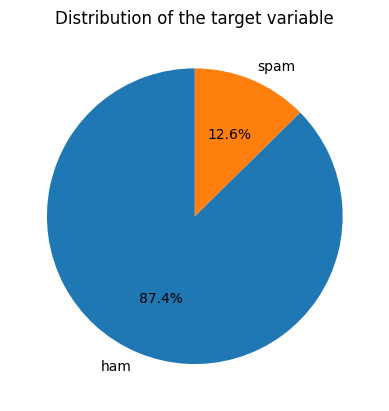

In [13]:
# Bar plot of the target variable
plt.pie(data['target'].value_counts(), labels=['ham', 'spam'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of the target variable')
plt.show()
# Imbalanced dataset

In [14]:
import nltk

In [15]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
# Number of Characters
data['num_chars'] = data['text'].apply(len)
data.head()

,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
# Number of Words
data['num_words'] = data['text'].apply(lambda x: len(nltk.word_tokenize(x)))
data.head()

,target,text,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [18]:
# Number of Sentences
data['num_sentences'] = data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
data.head()

,target,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [19]:
data.describe()

,target,num_chars,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.286129,1.961308
std,0.332253,58.236293,13.226400,1.432583
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,219.000000,38.000000


In [20]:
# Describe function for ham messages
data[data['target'] == 0][['num_chars', 'num_words', 'num_sentences' ]].describe()

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [21]:
# Describe function for spam messages
data[data['target'] == 1][['num_chars', 'num_words', 'num_sentences' ]].describe()

,num_chars,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


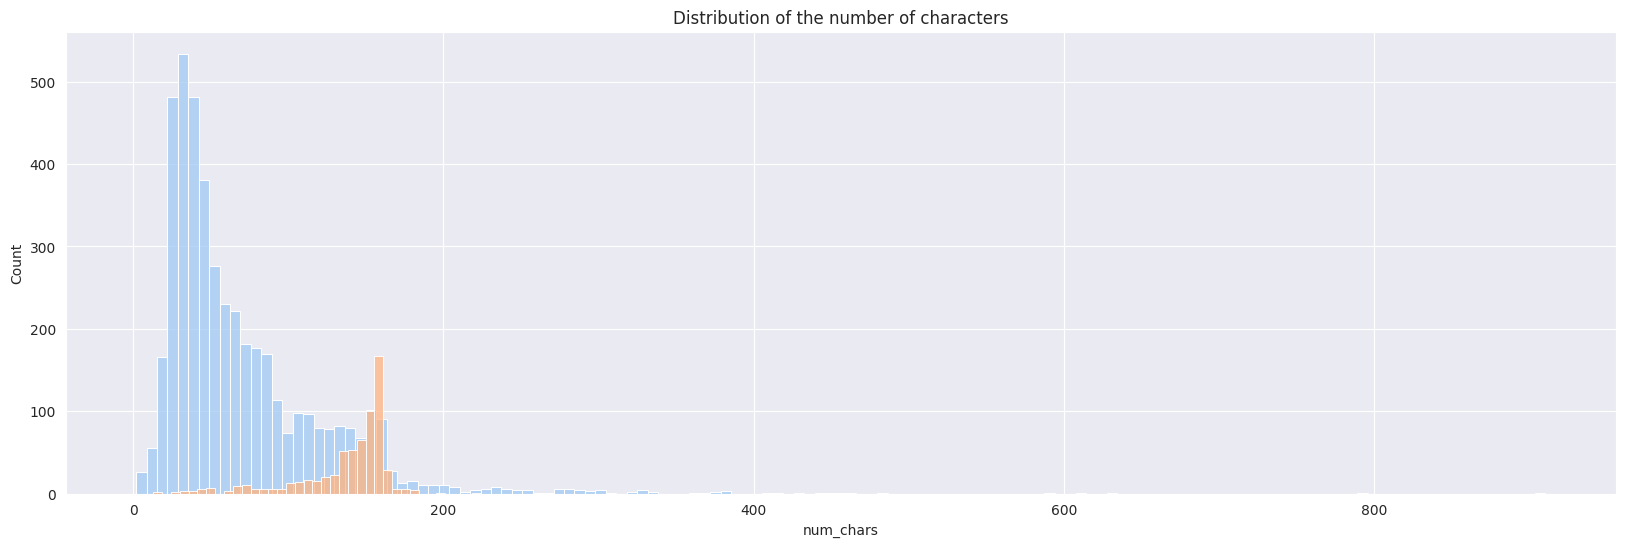

In [22]:
# Distribution of the number of characters
# set palette as 'pastel'
# set style as solarized
sns.set_palette('pastel')
sns.set_style('darkgrid')
plt.figure(figsize=(20, 6))
sns.histplot(data[data['target'] == 0]['num_chars'])
sns.histplot(data[data['target'] == 1]['num_chars'])
plt.title('Distribution of the number of characters')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


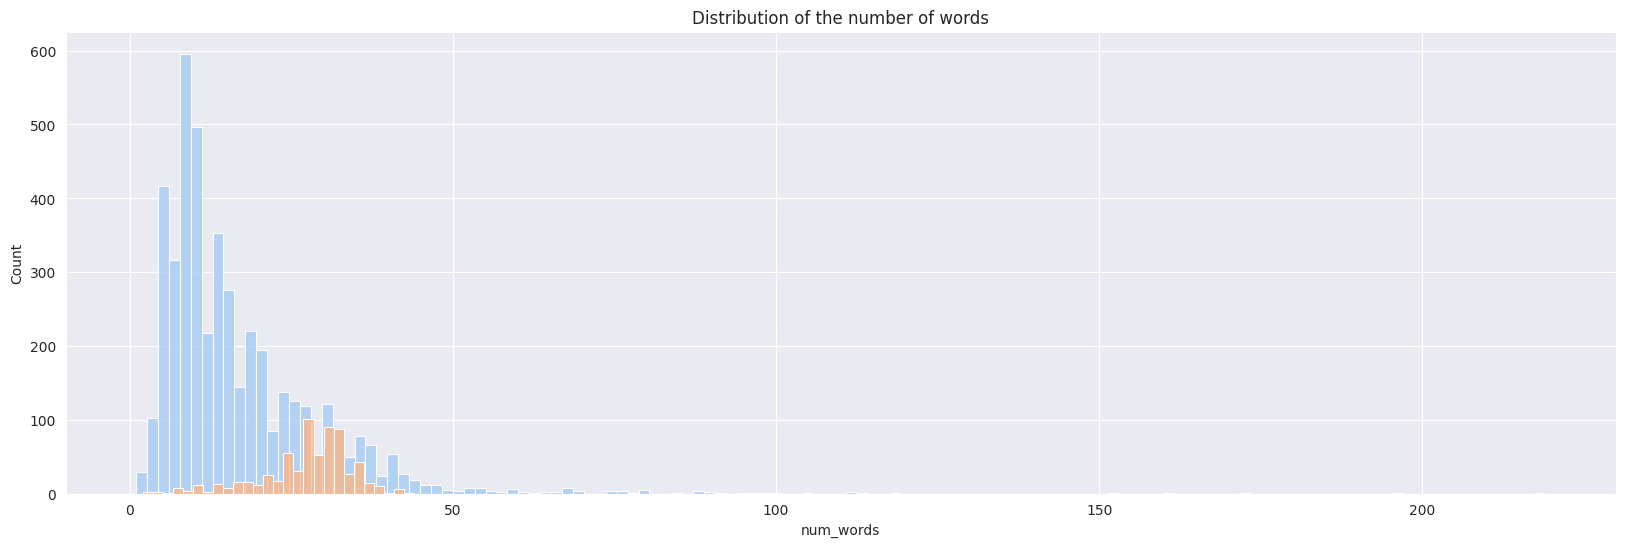

In [23]:
# Distribution of the number of words
sns.set_palette('pastel')
sns.set_style('darkgrid')
plt.figure(figsize=(20, 6))
sns.histplot(data[data['target'] == 0]['num_words'])
sns.histplot(data[data['target'] == 1]['num_words'])
plt.title('Distribution of the number of words')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


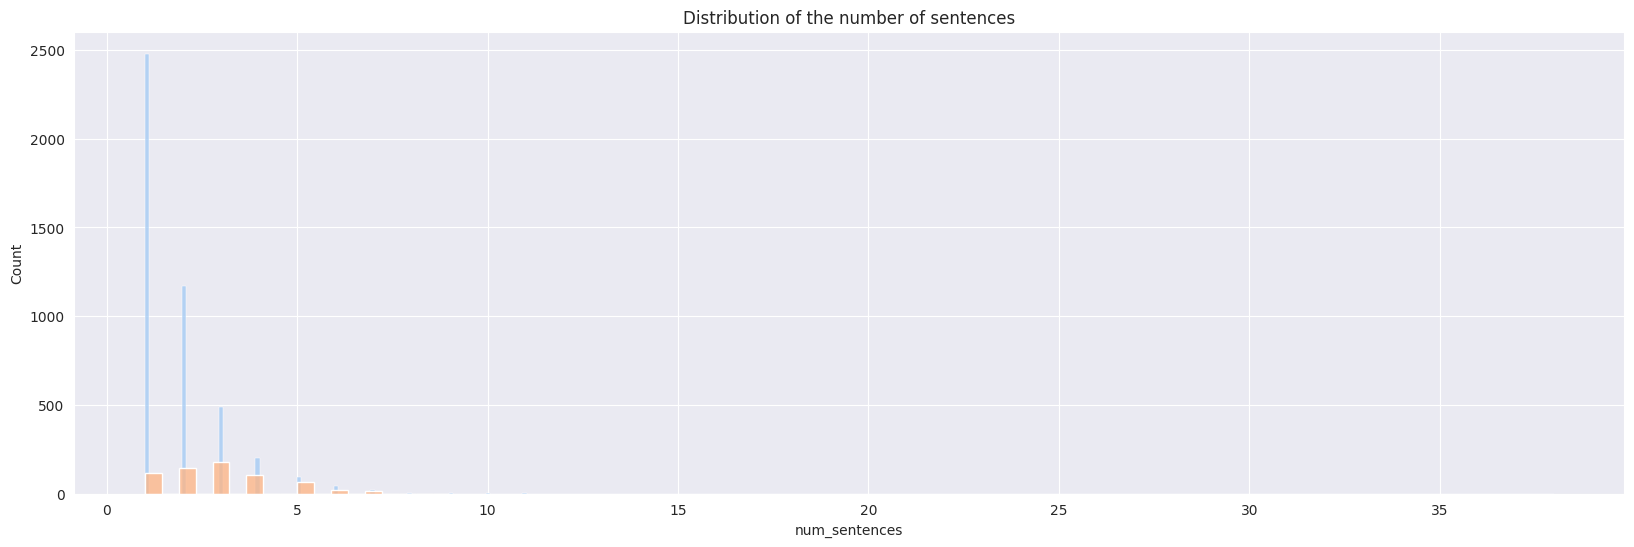

In [24]:
# Distribution of the number of sentences
sns.set_palette('pastel')
sns.set_style('darkgrid')
plt.figure(figsize=(20, 6))
sns.histplot(data[data['target'] == 0]['num_sentences'])
sns.histplot(data[data['target'] == 1]['num_sentences'])
plt.title('Distribution of the number of sentences')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


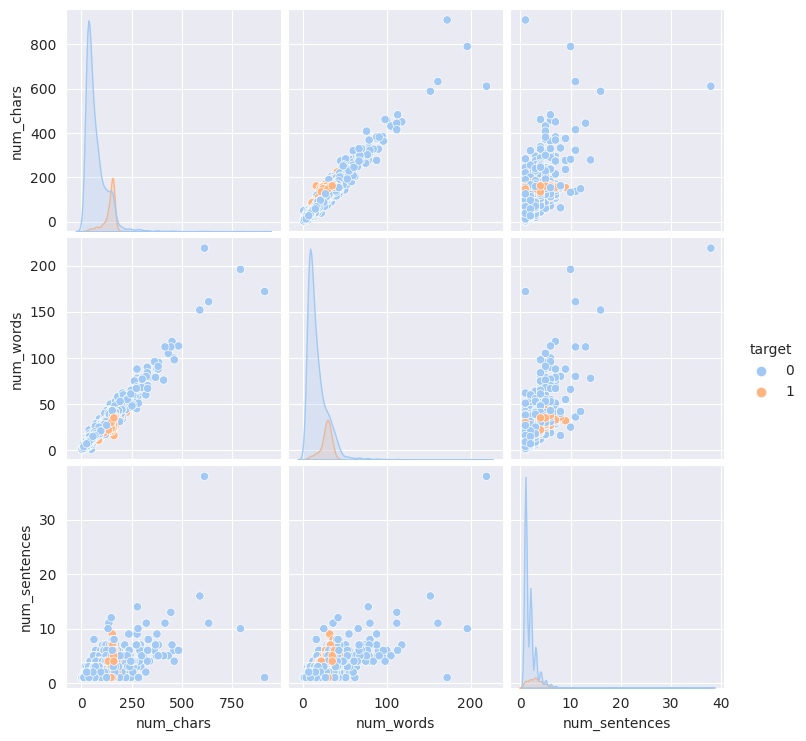

In [25]:
# Pairplot of the features 
sns.set_palette('pastel')
sns.set_style('darkgrid')
sns.pairplot(data, hue='target')
plt.show()

In [26]:
numeric_data = data.select_dtypes(include=[np.number])
numeric_data.corr()

,target,num_chars,num_words,num_sentences
target,1.000000,0.384717,0.264198,0.267602
num_chars,0.384717,1.000000,0.965307,0.626118
num_words,0.264198,0.965307,1.000000,0.683561
num_sentences,0.267602,0.626118,0.683561,1.000000


<Axes: >

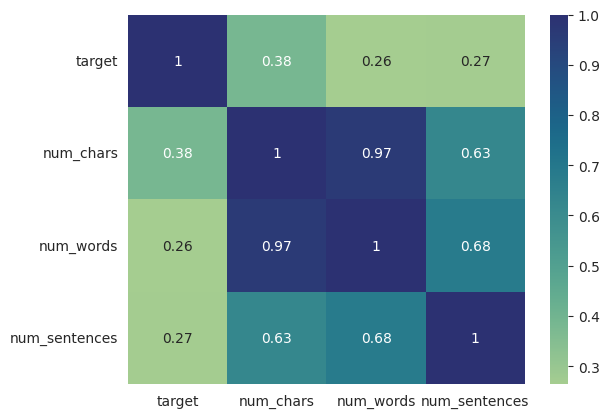

In [27]:
sns.heatmap(numeric_data.corr(), annot=True, cmap='crest')

In [28]:
# All the features are highly correlated with each other
# So, we will use only one feature for training the model
# num_chars is highly correlated with the target variable
# So, we will use num_chars for training the model

# data.drop(['num_words', 'num_sentences'], axis=1, inplace=True)

In [29]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [30]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [word for word in text if word.isalnum()]
    stopwords = nltk.corpus.stopwords.words('english')
    text = [word for word in text if word not in stopwords]
    text = [ps.stem(word) for word in text]
    text = ' '.join(text)
    return text

In [31]:
transform_text('I am learning Python and I am learning Machine Learning')

'learn python learn machin learn'

In [32]:
transform_text(data['text'][0])

'go jurong point avail bugi n great world la e buffet cine got amor wat'

In [33]:
data['transformed_text'] = data['text'].apply(transform_text)
data.head()

,target,text,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [34]:
from wordcloud import WordCloud
wc = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(' '.join(data['transformed_text']))

Text(0.5, 1.0, 'Most common words in ham messages')

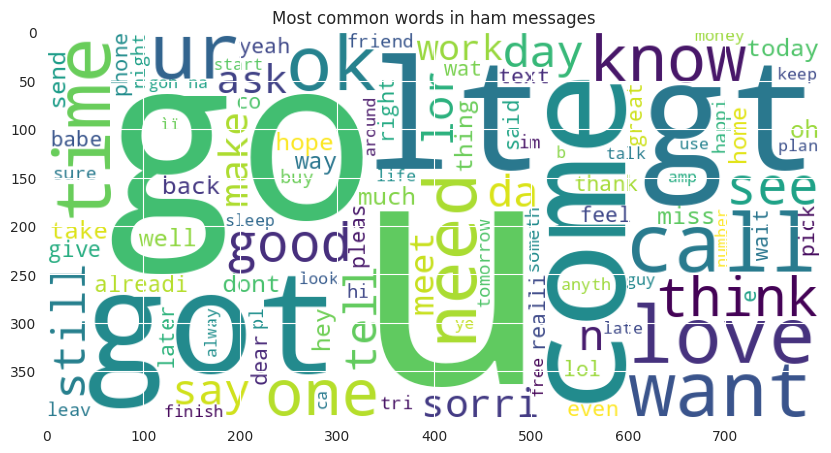

In [35]:
ham_wc = wc.generate(' '.join(data[data['target'] == 0]['transformed_text']))
plt.figure(figsize=(10, 6))
plt.imshow(ham_wc)
plt.title('Most common words in ham messages')

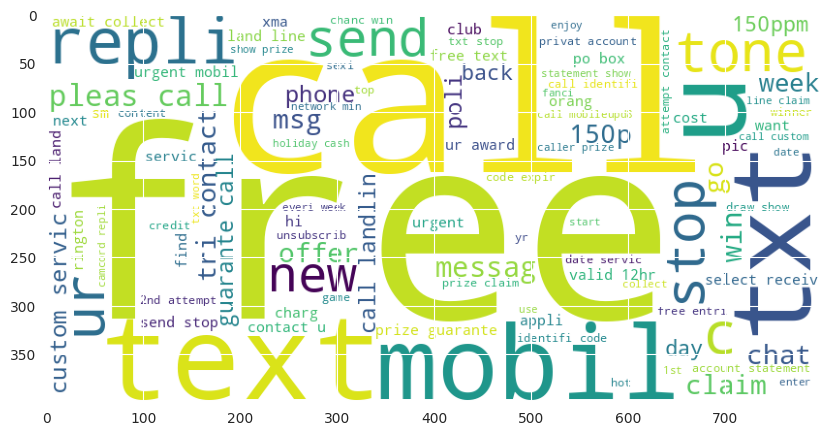

In [36]:
spam_wc = wc.generate(' '.join(data[data['target'] == 1]['transformed_text']))
plt.figure(figsize=(10, 6))
plt.imshow(spam_wc)


In [37]:
spam_corpus = []
for message in data[data['target'] == 1]['transformed_text']:
    for word in message.split():
        spam_corpus.append(word)

In [38]:
len(spam_corpus)

9883

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


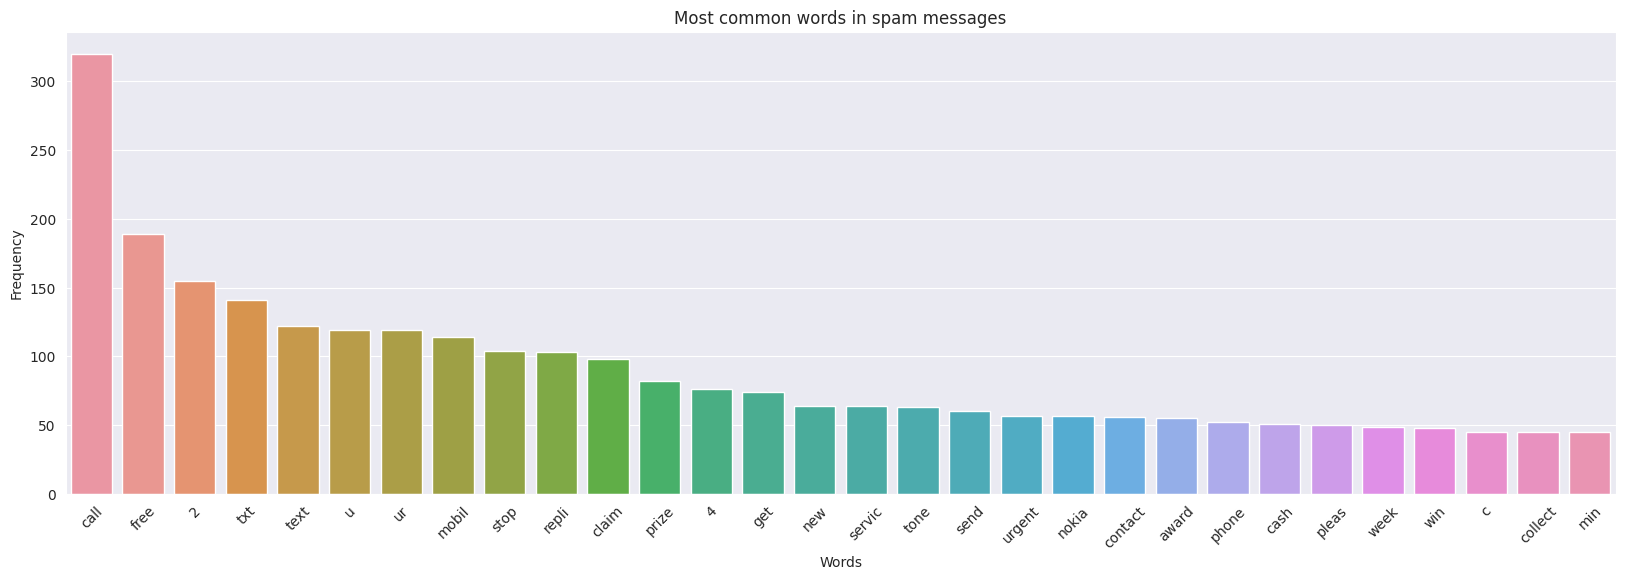

In [39]:
from collections import Counter
counter = Counter(spam_corpus)
sns.set_palette('pastel')
sns.set_style('darkgrid')
plt.figure(figsize=(20, 6))
sns.barplot(x=[item[0] for item in counter.most_common(30)], y=[item[1] for item in counter.most_common(30)])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most common words in spam messages')
plt.xticks(rotation=45)
plt.show()

In [40]:
ham_corpus = []
for message in data[data['target'] == 0]['transformed_text']:
    for word in message.split():
        ham_corpus.append(word)

In [41]:
len(ham_corpus)

34771

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


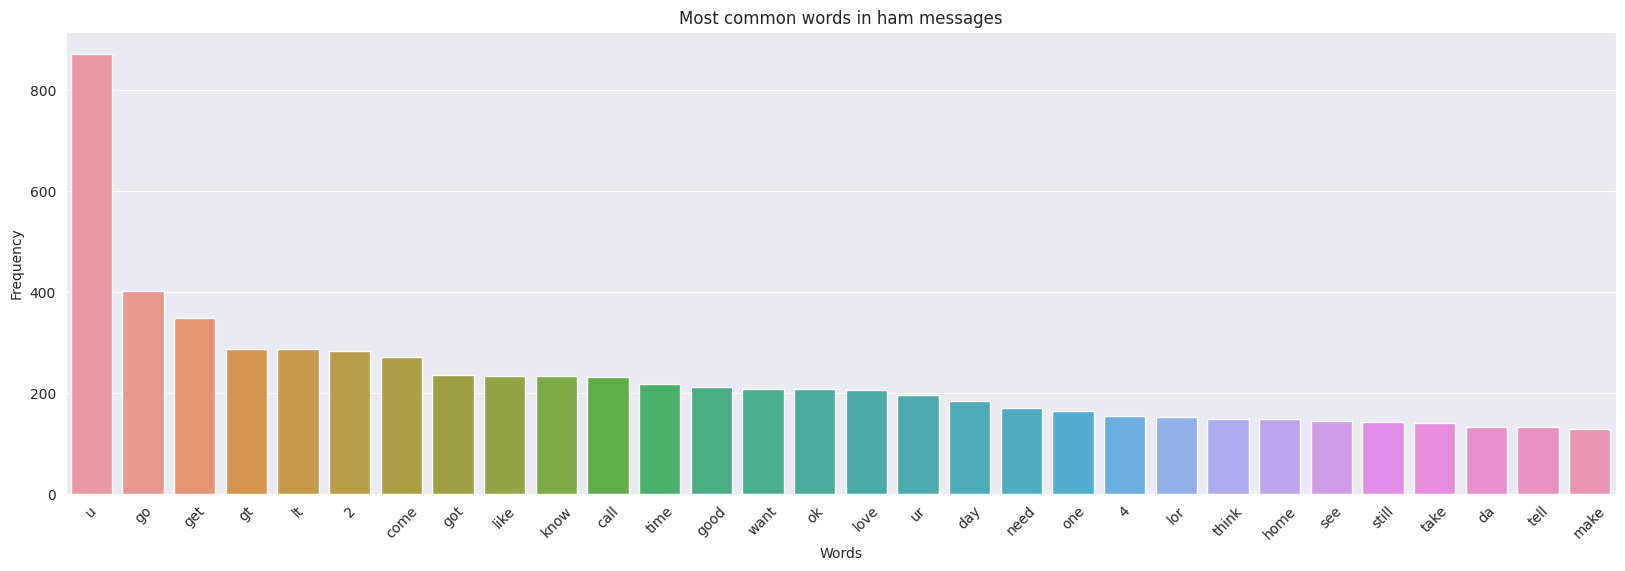

In [42]:
sns.set_palette('pastel')
sns.set_style('darkgrid')
counter = Counter(ham_corpus)
plt.figure(figsize=(20, 6))
sns.barplot(x=[item[0] for item in counter.most_common(30)], y=[item[1] for item in counter.most_common(30)])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most common words in ham messages')
plt.xticks(rotation=45)
plt.show()

In [43]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
etc = ExtraTreeClassifier()
svc = SVC(kernel='sigmoid', gamma=1.0)
knn = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
dtc = DecisionTreeClassifier(max_depth=5)
mnb = MultinomialNB()
gnb = GaussianNB()
bnb = BernoulliNB()

In [44]:
classifiers = {
    'Extra Tree Classifier': etc,
    'Support Vector Classifier': svc,
    'K Neighbors Classifier': knn,
    'Random Forest Classifier': rfc,
    'Decision Tree Classifier': dtc,
    'Multinomial Naive Bayes': mnb, 
    'Gaussian Naive Bayes': gnb,
    'Bernoulli Naive Bayes': bnb
}

In [45]:
from sklearn.feature_extraction.text import CountVectorizer # Bag of Words
cv = CountVectorizer()
data.head()

,target,text,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [46]:
X = cv.fit_transform(data['transformed_text'], data['num_chars']).toarray()
y = data['target'].values
X.shape, y.shape

((5169, 6629), (5169,))

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [48]:
def evaluate_vectorizer(X_train, X_test, y_train, y_test, classifiers):
    precision_scores = []
    accuracy_scores = []
    
    for name, model in classifiers.items():
        # Fit the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate precision and accuracy
        precision = precision_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store the results
        precision_scores.append(precision)
        accuracy_scores.append(accuracy)
    
    # Create a DataFrame to hold the performance scores
    performance_df = pd.DataFrame({
        'Model': list(classifiers.keys()), 
        'Accuracy': accuracy_scores, 
        'Precision': precision_scores
    }).sort_values(by='Precision', ascending=False)
    
    return performance_df

In [49]:
performance_cv = evaluate_vectorizer(X_train, X_test, y_train, y_test, classifiers)
print(performance_cv)

                       Model  Accuracy  Precision
2     K Neighbors Classifier  0.906190   1.000000
3   Random Forest Classifier  0.969052   1.000000
7      Bernoulli Naive Bayes  0.970986   0.973684
4   Decision Tree Classifier  0.924565   0.916667
0      Extra Tree Classifier  0.947776   0.850000
5    Multinomial Naive Bayes  0.965184   0.840000
1  Support Vector Classifier  0.925532   0.719424
6       Gaussian Naive Bayes  0.874275   0.517544


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer() # default

In [51]:
X1 = tfidf.fit_transform(data['transformed_text'], data['num_chars']).toarray()
y1 = data['target'].values
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=2)

In [52]:
performance_tfidf = evaluate_vectorizer(X_train, X_test, y_train, y_test, classifiers)
performance_tfidf

,Model,Accuracy,Precision
2,K Neighbors Classifier,0.900387,1.000000
5,Multinomial Naive Bayes,0.959381,1.000000
3,Random Forest Classifier,0.976789,0.991379
7,Bernoulli Naive Bayes,0.970986,0.973684
1,Support Vector Classifier,0.972921,0.966102
0,Extra Tree Classifier,0.941973,0.830508
4,Decision Tree Classifier,0.934236,0.830189
6,Gaussian Naive Bayes,0.870406,0.509009


In [53]:
tfidf1 = TfidfVectorizer(max_features=3000) # max_features = 3000 
X2 = tfidf1.fit_transform(data['transformed_text'], data['num_chars']).toarray()
y2 = data['target'].values
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=2)

In [54]:
performance_tfidf_3000 = evaluate_vectorizer(X_train, X_test, y_train, y_test, classifiers)
performance_tfidf_3000

,Model,Accuracy,Precision
2,K Neighbors Classifier,0.905222,1.000000
5,Multinomial Naive Bayes,0.972921,1.000000
7,Bernoulli Naive Bayes,0.981625,0.991736
3,Random Forest Classifier,0.971954,0.973913
1,Support Vector Classifier,0.974855,0.966667
4,Decision Tree Classifier,0.930368,0.843750
0,Extra Tree Classifier,0.945841,0.820312
6,Gaussian Naive Bayes,0.867505,0.502242


In [55]:
# Minmax scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [56]:
# Scaling the data
X3 = tfidf1.fit_transform(data['transformed_text'], data['num_chars']).toarray()
X3 = scaler.fit_transform(X3)
y3 = data['target'].values
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, random_state=2)

In [57]:
performance_scaled = evaluate_vectorizer(X_train, X_test, y_train, y_test, classifiers)
performance_scaled

,Model,Accuracy,Precision
2,K Neighbors Classifier,0.905222,1.000000
7,Bernoulli Naive Bayes,0.981625,0.991736
3,Random Forest Classifier,0.971954,0.973913
5,Multinomial Naive Bayes,0.978723,0.939394
1,Support Vector Classifier,0.970986,0.935484
4,Decision Tree Classifier,0.934236,0.857143
0,Extra Tree Classifier,0.940039,0.833333
6,Gaussian Naive Bayes,0.869439,0.506329


In [58]:
performance_temp = pd.merge(
    performance_cv,
    performance_tfidf,
    on='Model',
    how='inner',
    suffixes=('_cv', '_default')
)

performance_temp2 = pd.merge(
    performance_temp,
    performance_tfidf_3000,
    on='Model',
    how='inner'
)

performance = pd.merge(
    performance_temp2,
    performance_scaled,
    on='Model',
    how='inner',
    suffixes=('_3000', '_scaled')
)

performance

,Model,Accuracy_cv,Precision_cv,Accuracy_default,Precision_default,Accuracy_3000,Precision_3000,Accuracy_scaled,Precision_scaled
0,K Neighbors Classifier,0.906190,1.000000,0.900387,1.000000,0.905222,1.000000,0.905222,1.000000
1,Random Forest Classifier,0.969052,1.000000,0.976789,0.991379,0.971954,0.973913,0.971954,0.973913
2,Bernoulli Naive Bayes,0.970986,0.973684,0.970986,0.973684,0.981625,0.991736,0.981625,0.991736
3,Decision Tree Classifier,0.924565,0.916667,0.934236,0.830189,0.930368,0.843750,0.934236,0.857143
4,Extra Tree Classifier,0.947776,0.850000,0.941973,0.830508,0.945841,0.820312,0.940039,0.833333
5,Multinomial Naive Bayes,0.965184,0.840000,0.959381,1.000000,0.972921,1.000000,0.978723,0.939394
6,Support Vector Classifier,0.925532,0.719424,0.972921,0.966102,0.974855,0.966667,0.970986,0.935484
7,Gaussian Naive Bayes,0.874275,0.517544,0.870406,0.509009,0.867505,0.502242,0.869439,0.506329


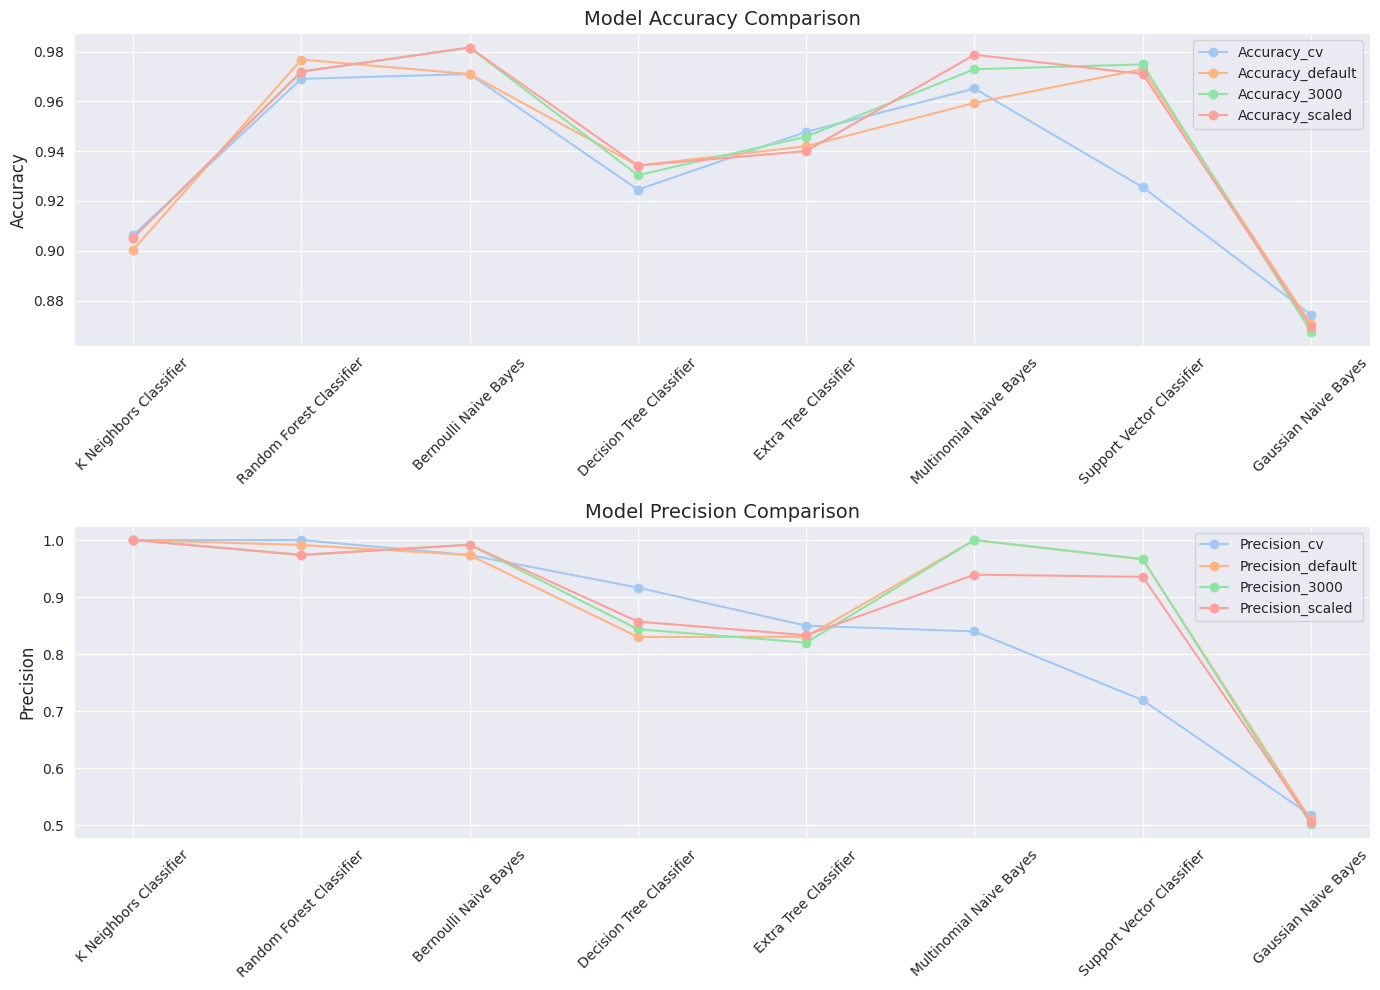

In [59]:
performance_df = pd.DataFrame(performance)

# Plotting performance metrics
fig, ax = plt.subplots(2, 1, figsize=(14, 10))
sns.set_palette('coolwarm')
sns.set_style('darkgrid')

# Accuracy Plot
for col in ["Accuracy_cv", "Accuracy_default", "Accuracy_3000", "Accuracy_scaled"]:
    ax[0].plot(performance_df["Model"], performance_df[col], marker="o", label=col)
ax[0].set_title("Model Accuracy Comparison", fontsize=14)
ax[0].set_ylabel("Accuracy", fontsize=12)
ax[0].legend()
ax[0].grid(True)
ax[0].tick_params(axis='x', rotation=45)

# Precision Plot
for col in ["Precision_cv", "Precision_default", "Precision_3000", "Precision_scaled"]:
    ax[1].plot(performance_df["Model"], performance_df[col], marker="o", label=col)
ax[1].set_title("Model Precision Comparison", fontsize=14)
ax[1].set_ylabel("Precision", fontsize=12)
ax[1].legend()
ax[1].grid(True)
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [60]:
# Best Model : Bernoulli Naive Bayes
# Vectorizer : TfidfVectorizer with 3000 features
# Save the model
import pickle

vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(data['transformed_text'], data['num_chars']).toarray()
X = scaler.fit_transform(X)
y = data['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

best_model = BernoulliNB()
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print(f"Model Precision: {precision:.2f}")

pickle.dump(best_model, open('/kaggle/working/model.pkl', 'wb'))
pickle.dump(vectorizer, open('/kaggle/working/vectorizer.pkl', 'wb'))

Model Accuracy: 0.98
Model Precision: 0.99
